# Question 1 : Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.
# Ans
----


### Difference between Linear Regression and Logistic Regression:

**Linear Regression:**
- **Type:** Linear regression is used for regression tasks, predicting continuous numeric values.
- **Output:** The output is a continuous value, typically representing a quantity, such as predicting house prices, stock prices, or temperature.
- **Model Formulation:** It uses a linear equation to establish a relationship between input features and the target variable.

**Logistic Regression:**
- **Type:** Logistic regression is used for classification tasks, predicting discrete categorical values.
- **Output:** The output is a probability score or categorical outcome (e.g., binary classification - 0 or 1).
- **Model Formulation:** It uses the logistic function (sigmoid) to map input features to a binary outcome.

### Scenario for Logistic Regression:
Consider a scenario of predicting whether a student will pass or fail an exam based on study hours. Here, logistic regression is more appropriate because:

- **Scenario:** Let's say you have data on students' study hours and whether they passed (1) or failed (0) the exam.
- **Output:** The goal is not to predict a continuous value (like predicting the actual score), but to classify students into pass or fail categories.
- **Nature of Prediction:** The outcome is binary, making logistic regression suitable for this scenario to estimate the probability of passing the exam based on study hours.

In this case, logistic regression would be utilized to create a model that maps study hours to the probability of passing the exam. It assigns a probability score between 0 and 1, allowing for binary classification based on a chosen threshold (e.g., if probability > 0.5, predict pass).

Linear regression, on the other hand, would not be suitable for this scenario as it aims to predict a continuous output (like the actual exam score), which doesn't align with the nature of this classification problem.

# Question 2 : What is the cost function used in logistic regression, and how is it optimized?
# Ans
-----

In logistic regression, the cost function used is the **log loss** or **cross-entropy loss** function. This function is employed to measure the difference between the predicted probability and the actual label for binary classification problems.

The formula for the logistic regression cost function (log loss) for binary classification is as follows:

$[ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] $]

Where:
- $( m $) is the number of training examples.
- $( y^{(i)} $) is the actual label for the $(i^{th}$) example (0 or 1).
- $( h_{\theta}(x^{(i)}) $) is the predicted probability that $( x^{(i)} $) belongs to class 1, based on the model's parameters.
- The summation calculates the average difference between the predicted and actual values for all training examples.

### Optimization of Logistic Regression Cost Function:

The logistic regression cost function is optimized using gradient descent or other optimization algorithms to minimize the cost. The objective is to find the optimal parameters ($( \theta $)) that minimize the cost function, leading to the best fitting model for the given data.

Here's a Python code snippet implementing logistic regression cost function calculation:


This code calculates the cost function for a given set of features (X) and target variable (y) with initial parameters (\( $theta $). It employs the sigmoid function to calculate the hypothesis and then computes the cost based on the logistic regression cost function formula. Adjusting the parameters using optimization algorithms aims to minimize this cost function.

Iteration 1: Cost = 0.6262987243523453
Iteration 11: Cost = 0.2948578216921824
Iteration 21: Cost = 0.18726771215631285
Iteration 31: Cost = 0.13692304204137404
Iteration 41: Cost = 0.10806267208133653
Iteration 51: Cost = 0.08940302282363743
Iteration 61: Cost = 0.07635407074189621
Iteration 71: Cost = 0.06671368117842912
Iteration 81: Cost = 0.05929726875126271
Iteration 91: Cost = 0.053411932675821255


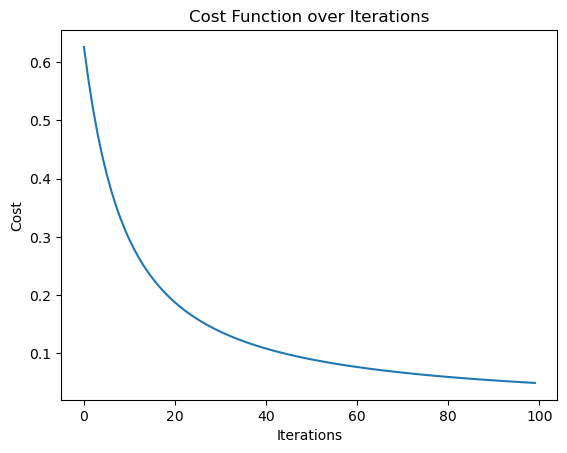

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Consider only two classes (Setosa and Versicolor)
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -1 / m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost[0][0])  # Store the cost for visualization
    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train.shape[1]).reshape(-1, 1)

# Perform gradient descent with multiple iterations
alpha = 0.1  # Learning rate
iterations = 100  # Number of iterations
updated_theta, cost_history = gradient_descent(X_train, y_train.reshape(-1, 1), theta, alpha, iterations)

count = len(cost_history)

# Print cost function values
for i in range(0,count,10):
    print(f"Iteration {i + 1}: Cost = {cost_history[i]}")
    count+=10
    

# Plot the cost function over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


In [10]:
# Compute cost after one iteration
print("Initial Cost:", cost_history[0])
print("Updated Theta:", updated_theta)

# Calculate accuracy after one iteration
predicted_probabilities = sigmoid(X_test @ updated_theta)
predicted_labels = (predicted_probabilities >= 0.5).astype(int)

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy after one iteration:", accuracy)


Initial Cost: 0.6262987243523453
Updated Theta: [[ 0.09636138]
 [ 0.74791207]
 [-0.84648687]
 [ 1.12592425]
 [ 1.12866062]]
Accuracy after one iteration: 1.0


# Question 3 : Explain the concept of regularization in logistic regression and how it helps prevent overfitting.
# Ans
-------
Regularization in logistic regression involves adding a penalty term to the cost function that penalizes complex models by discouraging overly large parameter values. It helps prevent overfitting, where a model fits the training data too closely and performs poorly on new, unseen data.

### How Regularization Works in Logistic Regression:

1. **Cost Function with Regularization:**
   In logistic regression, the cost function with regularization is expressed as:

   $[ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^{2} $]

   - The first part of the equation represents the standard logistic regression cost function.
   - The second part, often referred to as the regularization term, adds a penalty component that depends on the squared values of the model's parameters ($( \theta $)).
   - $( \lambda $) is the regularization parameter (also known as the regularization strength), and it controls how much the regularization term influences the overall cost function. Higher $( \lambda $) values lead to stronger regularization.

2. **Effect on Model Complexity:**
   - With regularization, the model is penalized for having large parameter values. It constrains the model from fitting the noise in the data, encouraging it to find more generalizable patterns.
   - High parameter values are discouraged, effectively simplifying the model by reducing the impact of less essential features.

3. **Preventing Overfitting:**
   - Overfitting occurs when a model fits the training data too closely, capturing noise and performing poorly on new data.
   - Regularization helps prevent overfitting by discouraging overly complex models. It provides a trade-off between fitting the training data well and generalizing to new, unseen data.

4. **Balancing Bias and Variance:**
   - Regularization assists in finding a balance between bias and variance. It helps in reducing variance (overfitting) without significantly increasing bias (underfitting) by controlling the model's complexity.



# Question 4 : What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?
# Ans
-------
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classification model. It shows the performance of a classification model across various threshold settings.

### Key Points about ROC Curve:

1. **Definition:**
   The ROC curve is a plot of the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) at various threshold settings. Each point on the ROC curve represents a sensitivity/specificity pair associated with a particular threshold.

2. **True Positive Rate (Sensitivity):**
   - Sensitivity refers to the model's ability to correctly identify positive instances (actual positives) as positive.
   - It is calculated as: $(\text{Sensitivity} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$)

3. **False Positive Rate (1 - Specificity):**
   - 1 - Specificity measures the proportion of negative instances (actual negatives) that are incorrectly classified as positive.
   - It is calculated as: $(\text{1 - Specificity} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$)

4. **Area Under the Curve (AUC):**
   - The AUC represents the area under the ROC curve. A perfect classifier has an AUC of 1, while a random classifier has an AUC of 0.5.
   - A higher AUC value suggests a better-performing model in terms of its ability to distinguish between the two classes.

### Usage in Logistic Regression:

1. **Evaluation of Model Performance:**
   - The ROC curve is commonly used to evaluate the performance of logistic regression models for binary classification problems.
   - By plotting the ROC curve, it showcases the trade-off between true positive rate and false positive rate across various classification thresholds.

2. **Threshold Selection:**
   - The choice of threshold affects the trade-off between true positive and false positive rates.
   - Adjusting the threshold helps in controlling the balance between false positives and false negatives, depending on the application's requirements.

3. **Comparing Models:**
   - It allows for the comparison of different models. The model with a higher AUC and a curve closer to the top-left corner indicates better discrimination ability between classes.

The ROC curve and AUC provide a comprehensive and visual representation of a model's performance across various classification thresholds, making it a valuable tool for assessing and comparing classification models, including those built with logistic regression.

AUC: 0.9216159179981912


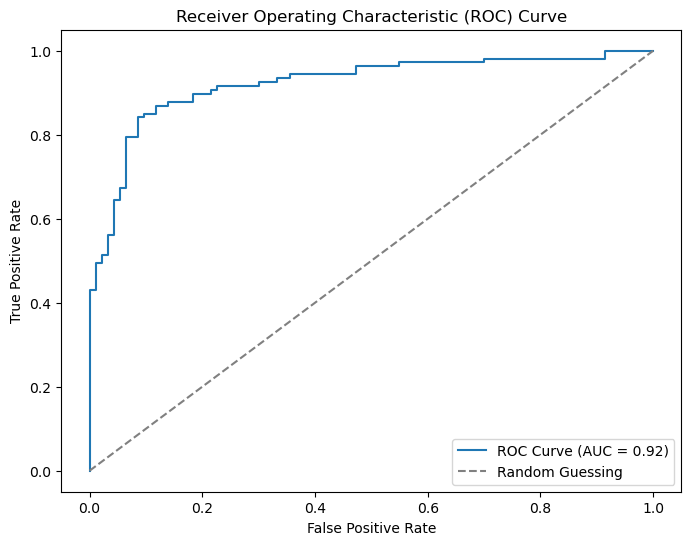

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Question 5 : What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?
# Ans
------
Common techniques for feature selection in logistic regression aim to improve model performance by identifying and using the most informative features while excluding irrelevant or redundant ones. Here are several techniques:

1. **Univariate Feature Selection:**
   - **Chi-Square Test:** Measures the independence between each feature and the target variable. SelectKBest in scikit-learn can be used for this purpose.
   - **Information Gain:** Measures the reduction in entropy of the target variable based on each feature.

2. **Model-Based Feature Selection:**
   - **Recursive Feature Elimination (RFE):** Recursively fits the model and eliminates the least important features based on feature weights or coefficients. This process continues until the specified number of features is reached.
   - **L1 Regularization (Lasso):** Encourages sparsity in feature weights, forcing some coefficients to be exactly zero, effectively performing feature selection.

3. **Feature Importance Methods:**
   - **Tree-based Methods (e.g., Random Forest, Gradient Boosting):** These models offer feature importance scores that can be used for selection.
   - **XGBoost Feature Importance:** XGBoost models provide built-in methods to determine feature importance.

4. **Variance Threshold:**
   - Removes features with low variance, assuming features with low variance are less informative.

### How These Techniques Improve Model Performance:

- **Reduction of Overfitting:** By removing irrelevant or redundant features, the model is less likely to overfit the training data and performs better on unseen data.
- **Improved Computational Efficiency:** Utilizing fewer features reduces computational requirements, making the model more efficient during training and inference.
- **Enhanced Interpretability:** Fewer features often result in a simpler model, aiding in better interpretability of the model's decision-making process.
- **Focus on Informative Features:** By selecting the most informative features, these techniques allow the model to concentrate on the most relevant information for better predictive performance.

The choice of feature selection technique often depends on the dataset, the number of features, and the specific requirements of the problem at hand. Each technique has its advantages and may be more suitable depending on the nature and context of the dataset being analyzed.

# Question 6 : How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalannce?
# Ans
-----
Dealing with imbalanced datasets in logistic regression is crucial as it can lead to biased models that favor the majority class. Here are some strategies to handle class imbalance in logistic regression:

1. **Resampling Techniques:**
   - **Over-sampling:** Increase the number of instances in the minority class by duplicating samples or generating synthetic examples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
   - **Under-sampling:** Reduce the number of instances in the majority class by randomly removing samples until a more balanced distribution is achieved.

2. **Algorithmic Approaches:**
   - **Class Weight Balancing:** Adjust class weights within the logistic regression algorithm to penalize misclassification of the minority class more by giving it higher weight.
   - **Cost-Sensitive Learning:** Assign different misclassification costs to different classes. Penalize errors on the minority class more by setting higher costs.

3. **Ensemble Methods:**
   - **Bagging and Boosting Techniques:** Utilize ensemble methods like Random Forest, Gradient Boosting, or AdaBoost, which are capable of handling imbalanced data better by adjusting weights and combining multiple models.

4. **Threshold Adjustment:**
   - Instead of using the default threshold of 0.5 for classification, adjust the threshold based on the business requirement. Choosing an optimal threshold can balance precision and recall for imbalanced classes.

5. **Performance Metrics:**
   - Use appropriate evaluation metrics that are robust to imbalanced data, such as precision, recall, F1-score, area under the Precision-Recall curve, or ROC-AUC.

6. **Feature Engineering:**
   - Create new features or use domain knowledge to better represent the minority class, making it more distinguishable.

7. **Cross-Validation and Hyperparameter Tuning:**
   - Use techniques like cross-validation to ensure the model's generalizability. Fine-tune hyperparameters to handle class imbalance effectively.

8. **Data Collection and Resampling Strategies:**
   - Collect more data for the minority class, if possible. Otherwise, apply different resampling strategies to rebalance the dataset.

By implementing these strategies, it's possible to mitigate the effects of class imbalance and train logistic regression models that better handle and learn from imbalanced datasets, resulting in more accurate and reliable predictions for both classes. The selection of a specific strategy should be driven by the nature of the dataset and the problem at hand.

# Question 7 : Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?
# Ans
-----
Certainly! Multicollinearity among independent variables in logistic regression can cause challenges in the model's interpretation and estimation of coefficients. Here's how to address this and other common issues:

### Multicollinearity among Independent Variables:

1. **Issue:** Multicollinearity occurs when two or more independent variables are highly correlated, leading to unstable coefficient estimates and reduced interpretability.

2. **Addressing Multicollinearity:**
   - **VIF (Variance Inflation Factor):** Calculate the VIF for each variable and remove those with high VIF values (generally VIF > 5 or 10) to mitigate multicollinearity.
   - **Feature Selection:** Use techniques like Recursive Feature Elimination (RFE), Lasso, or manual selection to eliminate redundant variables.

### Other Common Issues:

1. **Overfitting:**
   - **Address:** Use regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients, preventing overfitting.

2. **Imbalanced Data:**
   - **Address:** Employ resampling techniques (oversampling, undersampling), adjust class weights, or use performance metrics suitable for imbalanced data (e.g., F1-score, area under the Precision-Recall curve).

3. **Outliers:**
   - **Address:** Outliers can impact model performance. Apply transformations, remove or treat outliers using robust statistical methods.

4. **Missing Values:**
   - **Address:** Impute missing values using techniques like mean, median, mode imputation, or advanced methods like KNN imputation.

5. **Non-linearity:**
   - **Address:** Consider transforming variables, using polynomial features, or non-linear transformations to capture non-linear relationships.

6. **Model Complexity:**
   - **Address:** Simplify the model by eliminating irrelevant features, employing feature selection methods, or using simpler models.

7. **Model Evaluation:**
   - **Address:** Utilize appropriate evaluation metrics for the problem (e.g., AUC-ROC, precision, recall, F1-score) and avoid evaluating solely on accuracy for imbalanced datasets.

### Conclusion:

Addressing multicollinearity and other common challenges involves using a combination of statistical techniques, feature engineering, and domain knowledge. Prioritizing data preprocessing, choosing appropriate evaluation metrics, and employing regularization techniques can significantly enhance the performance and robustness of logistic regression models. The choice of solution often depends on the specific characteristics of the dataset and the context of the problem.

In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_breast_cancer  # Using a sample dataset for demonstration

# Load the dataset (Replace this with your dataset)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Display variables with high VIF (indicative of multicollinearity)
threshold = 5  # Example threshold (you can adjust this threshold)
high_vif_vars = vif_data[vif_data['VIF'] > threshold]
print("Variables with high VIF (indicative of multicollinearity):")
print(high_vif_vars)

# To address multicollinearity, you can remove one of the highly correlated variables
# Example: Removing the variable with the highest VIF
if not high_vif_vars.empty:
    var_to_remove = high_vif_vars.iloc[0]['Feature']
    df.drop(columns=var_to_remove, inplace=True)
    print(f"\nVariable '{var_to_remove}' removed due to high multicollinearity.")


Variables with high VIF (indicative of multicollinearity):
                    Feature           VIF
0               mean radius  63306.172036
1              mean texture    251.047108
2            mean perimeter  58123.586079
3                 mean area   1287.262339
4           mean smoothness    393.398166
5          mean compactness    200.980354
6            mean concavity    157.855046
7       mean concave points    154.241268
8             mean symmetry    184.426558
9    mean fractal dimension    629.679874
10             radius error    236.665738
11            texture error     24.675367
12          perimeter error    211.396334
13               area error     72.466468
14         smoothness error     26.170243
15        compactness error     44.919651
16          concavity error     33.244099
17     concave points error     53.698656
18           symmetry error     37.176452
19  fractal dimension error     27.532631
20             worst radius   9674.742602
21            wor